In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Things to Implement:
1. Try Different Tokenizers
2. TF-IDF Vecorization 
3. Word2Vec

In [3]:
# with open("News_Category_Dataset_v3.json", mode = "r") as f:
#     data = f.read()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_json("/content/drive/MyDrive/Personal Projects/NLP POCs/News_Category_Dataset_v3.json", lines = True)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [10]:
df.date.max(), df.date.min()

(Timestamp('2022-09-23 00:00:00'), Timestamp('2012-01-28 00:00:00'))

In [11]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

Lets take 5 categories and 5000 rows for each
1. POLITICS
1. SPORTS
1. TRAVEL
1. ENTERTAINMENT
1. BUSINESS

In [12]:
df_politics = df[df.category == "POLITICS"].reset_index(drop = True)
df_sports = df[df.category == "SPORTS"].reset_index(drop = True)
df_travel = df[df.category == "TRAVEL"].reset_index(drop = True)
df_entertainment = df[df.category == "ENTERTAINMENT"].reset_index(drop = True)
df_business = df[df.category == "BUSINESS"].reset_index(drop = True)

In [13]:
df_politics.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
1,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
2,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18
3,https://www.huffpost.com/entry/afghan-adjustme...,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Hamed Ahmadi and Arthur Delaney,2022-09-16
4,https://www.huffpost.com/entry/capitol-riot-in...,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,"ERIC TUCKER, AP",2022-09-15


In [14]:
import random

In [15]:
df_list = []
random.seed(123456)
for df_temp in [df_politics,df_sports,df_travel,df_entertainment,df_business]:
    r = random.sample(range(df_temp.shape[0]), 5000)
    df_temp = df_temp.copy()
    df_temp = df_temp.iloc[r]
    df_list.append(df_temp.copy())

In [16]:
df = pd.concat(df_list,ignore_index = True)

In [17]:
df = df[["short_description", "category"]]

Idea now is to vectorize the short descriptions and evaluate the embedding that are generated
Things to consider:
1. Weather to use tokenization or not. If Yes, what type of embedding 
2. Weather to remove stop words 
3. How to select top words or tokens to represents the final vector

### Not using tokenization

In [18]:
df.loc[:,"short_description_lc"] = df.short_description.str.lower()

In [19]:
import re

In [20]:
sent = "Aadil !!my is name."
pat = r"(?u)\b\w\w+\b"
def remove_punctuation(string):
#     return re.findall(pat,string.lower())
    return " ".join(re.findall(pat,string.lower()))
remove_punctuation(sent)

'aadil my is name'

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
t_vec = TfidfVectorizer(input = "content")

In [18]:
t_vec.fit(df.short_description_lc)

TfidfVectorizer()

In [19]:
t_vec.transform(["few think trump was right to fire comey."]).toarray().shape

(1, 29277)

In [20]:
df.iloc[2,2]

'few think trump was right to fire comey.'

In [21]:
t_vec.get_feature_names_out().shape

(29277,)

In [22]:
df_tfidf = pd.DataFrame(t_vec.transform(df.short_description_lc).toarray(), columns = t_vec.get_feature_names_out())

In [ ]:
# Too long for each document. Doesnt fit into memory.
# We will take 5000 features which have the highest variance.

In [ ]:
# imp_features = list(df_tfidf.sum().sort_values(ascending = False)[100:5100].index)

In [28]:
import gc

gc.collect()

0

In [31]:
var_list = []
for i in range(df_tfidf.shape[1]):
  if i%200 == 0 : print(f"{i} done!")
  var_list.append((i,df_tfidf.iloc[:,i].var()))

0 done!
200 done!
400 done!
600 done!
800 done!
1000 done!
1200 done!
1400 done!
1600 done!
1800 done!
2000 done!
2200 done!
2400 done!
2600 done!
2800 done!
3000 done!
3200 done!
3400 done!
3600 done!
3800 done!
4000 done!
4200 done!
4400 done!
4600 done!
4800 done!
5000 done!
5200 done!
5400 done!
5600 done!
5800 done!
6000 done!
6200 done!
6400 done!
6600 done!
6800 done!
7000 done!
7200 done!
7400 done!
7600 done!
7800 done!
8000 done!
8200 done!
8400 done!
8600 done!
8800 done!
9000 done!
9200 done!
9400 done!
9600 done!
9800 done!
10000 done!
10200 done!
10400 done!
10600 done!
10800 done!
11000 done!
11200 done!
11400 done!
11600 done!
11800 done!
12000 done!
12200 done!
12400 done!
12600 done!
12800 done!
13000 done!
13200 done!
13400 done!
13600 done!
13800 done!
14000 done!
14200 done!
14400 done!
14600 done!
14800 done!
15000 done!
15200 done!
15400 done!
15600 done!
15800 done!
16000 done!
16200 done!
16400 done!
16600 done!
16800 done!
17000 done!
17200 done!
17400 done!
1

In [34]:
var_list = sorted(var_list, key = lambda x : x[1], reverse = True)
imp_features_tuples = var_list[:5000]
imp_features = [i[0] for i in imp_features_tuples]

In [36]:
df_tfidf = df_tfidf.iloc[:,imp_features]

In [37]:
df_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 5000 entries, the to signature
dtypes: float64(5000)
memory usage: 953.7 MB


In [38]:
df_tfidf.to_parquet("/content/drive/MyDrive/Personal Projects/NLP POCs/News_Category_Dataset_v3_tfidf_5k_by_var.parquet", index=False)

In [5]:
df_tfidf = pd.read_parquet("/content/drive/MyDrive/Personal Projects/NLP POCs/News_Category_Dataset_v3_tfidf_5k_by_var.parquet")

In [6]:
df_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 5000 entries, the to signature
dtypes: float64(5000)
memory usage: 953.7 MB


In [7]:
from sklearn.preprocessing import scale

In [ ]:
# df_tfidf.iloc[:,:] = scale(df_tfidf)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader

In [9]:
df_tfidf.iloc[:,1].std(), df_tfidf.iloc[1].std()

(0.057805410224015245, 0.013253084079853941)

In [21]:
df_tfidf = pd.concat([df,df_tfidf], axis=1)

In [22]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features, return_encoding = False):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        if return_encoding:
          return code
        return reconstructed

In [23]:
batch_size = 512
epochs = 60
learning_rate = 1e-3

In [24]:
seed = 42
torch.manual_seed(seed)

In [25]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=5000).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# mean-squared error loss
criterion = nn.MSELoss()

In [26]:

df_tfidf.head()

,short_description,category,short_description_lc,the,you,it,to,of,is,we,...,premieres,thankfully,leisure,journalist,rent,lodge,teenager,testify,redskins,signature
0,The U.S. government says otherwise.,POLITICS,the u.s. government says otherwise.,0.135435,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""The problem hadn’t gone away, only now there ...",POLITICS,"""the problem hadn’t gone away, only now there ...",0.058136,0.0,0.0,0.000000,0.161914,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Few think Trump was right to fire Comey.,POLITICS,few think trump was right to fire comey.,0.000000,0.0,0.0,0.129743,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The GOP candidate faces Democrat John Fetterma...,POLITICS,the gop candidate faces democrat john fetterma...,0.064586,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The White House chief of staff has come under ...,POLITICS,the white house chief of staff has come under ...,0.049052,0.0,0.0,0.000000,0.136612,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
class MyDataset(Dataset):
 
  def __init__(self,df):
    x=df.iloc[:,3:].values
 
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.zeros(x.shape[0])
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

In [28]:
df_train = MyDataset(df_tfidf)

In [29]:
train_loader = torch.utils.data.DataLoader(
    df_train, batch_size=batch_size, shuffle=True
)

In [30]:
losses = []
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        
        batch_features = batch_features.to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    losses.append(loss)
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))

epoch : 1/60, recon loss = 0.00033791
epoch : 2/60, recon loss = 0.00013053
epoch : 3/60, recon loss = 0.00013039
epoch : 4/60, recon loss = 0.00013018
epoch : 5/60, recon loss = 0.00012988
epoch : 6/60, recon loss = 0.00012941
epoch : 7/60, recon loss = 0.00012883
epoch : 8/60, recon loss = 0.00012833
epoch : 9/60, recon loss = 0.00012774
epoch : 10/60, recon loss = 0.00012690
epoch : 11/60, recon loss = 0.00012610
epoch : 12/60, recon loss = 0.00012523
epoch : 13/60, recon loss = 0.00012456
epoch : 14/60, recon loss = 0.00012394
epoch : 15/60, recon loss = 0.00012336
epoch : 16/60, recon loss = 0.00012294
epoch : 17/60, recon loss = 0.00012259
epoch : 18/60, recon loss = 0.00012228
epoch : 19/60, recon loss = 0.00012210
epoch : 20/60, recon loss = 0.00012201
epoch : 21/60, recon loss = 0.00012187
epoch : 22/60, recon loss = 0.00012179
epoch : 23/60, recon loss = 0.00012169
epoch : 24/60, recon loss = 0.00012163
epoch : 25/60, recon loss = 0.00012159
epoch : 26/60, recon loss = 0.0001

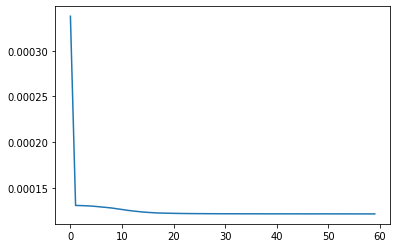

In [31]:
plt.plot(losses)

In [32]:
test_loader = DataLoader(df_train, batch_size=batch_size, shuffle=False)
results = []
with torch.no_grad():
    for batch_features, _ in test_loader:
        test_examples = batch_features
        new_rep = model(test_examples, return_encoding = True)
        results.extend(new_rep)
results[0]

tensor([0.1176, 0.0000, 0.0000, 0.0000, 0.0675, 0.0000, 0.2900, 0.0000, 0.0991,
        0.0000, 0.1425, 0.1744, 0.1239, 0.1440, 0.0000, 0.0082, 0.1331, 0.0895,
        0.0694, 0.0000, 0.1347, 0.2426, 0.0000, 0.0000, 0.0273, 0.0000, 0.0000,
        0.0000, 0.0633, 0.0082, 0.1573, 0.0000, 0.0000, 0.0000, 0.1439, 0.0000,
        0.0846, 0.0453, 0.1335, 0.0000, 0.2626, 0.1295, 0.0889, 0.0000, 0.0000,
        0.0000, 0.1562, 0.1298, 0.1820, 0.1203, 0.1417, 0.2181, 0.1083, 0.0000,
        0.0226, 0.0000, 0.0975, 0.0000, 0.0000, 0.0000, 0.1906, 0.2304, 0.1129,
        0.1592, 0.0782, 0.1506, 0.0000, 0.2365, 0.2562, 0.2519, 0.1112, 0.0022,
        0.0657, 0.0861, 0.0000, 0.1485, 0.1761, 0.0000, 0.1062, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1292, 0.1546, 0.2244, 0.0216, 0.0422, 0.2412, 0.0000,
        0.0000, 0.0039, 0.2028, 0.0000, 0.0754, 0.0000, 0.0727, 0.0000, 0.0378,
        0.0000, 0.0000, 0.0000, 0.1554, 0.0000, 0.0000, 0.0000, 0.0162, 0.0914,
        0.2525, 0.1829, 0.1038, 0.1010, 

In [33]:
results = [i.numpy() for i in results]

In [34]:
df_ae = pd.DataFrame(results).add_prefix("tfidf_ae_")

In [35]:
df_ae["category"] = df_tfidf.iloc[:,1]

,tfidf_ae_0,tfidf_ae_1,tfidf_ae_2,tfidf_ae_3,tfidf_ae_4,tfidf_ae_5,tfidf_ae_6,tfidf_ae_7,tfidf_ae_8,tfidf_ae_9,...,tfidf_ae_119,tfidf_ae_120,tfidf_ae_121,tfidf_ae_122,tfidf_ae_123,tfidf_ae_124,tfidf_ae_125,tfidf_ae_126,tfidf_ae_127,category
0,29.559521,16.372679,17.279541,18.396219,21.046118,24.398756,39.089859,8.143525,9.972583,15.902320,...,24.529997,5.579521,13.777115,20.725094,19.539539,44.073639,15.323485,7.406268,13.001886,POLITICS
1,20.440866,1.850649,20.447849,13.946979,12.962066,0.000000,15.494950,0.000000,9.416042,6.794409,...,13.251480,20.338940,8.916128,2.927242,13.107708,6.721844,10.953701,18.122925,18.331577,POLITICS
2,15.778991,12.974376,5.254664,15.154055,4.065876,22.840647,20.467993,1.917624,18.073395,17.335939,...,10.656110,9.473711,2.932046,6.711880,6.674568,16.966513,2.012691,4.429705,6.391711,POLITICS
3,6.170900,8.340593,15.308140,7.771174,8.092597,9.040556,15.805655,6.916036,6.084162,0.000000,...,16.558119,10.300123,3.750199,2.056651,10.457068,12.901435,3.440248,5.970746,8.065324,POLITICS
4,6.495595,7.011634,11.672403,2.252959,12.700036,14.062491,22.236628,19.742561,12.910153,12.094226,...,15.843175,10.672318,1.131571,24.774008,10.310240,13.235180,4.198112,12.621463,11.047297,POLITICS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,5.275981,12.263979,20.298548,15.640422,16.932775,16.691601,11.499437,4.239751,13.611385,22.525059,...,17.780558,11.591769,11.466097,5.886870,7.969640,9.027387,11.461274,10.723508,14.868418,BUSINESS
24996,14.799742,8.747124,22.011595,16.553486,15.851092,10.511800,6.211651,8.800545,11.283540,16.104057,...,12.148927,4.623395,4.573869,8.746048,5.728227,15.224044,11.209795,10.333214,12.965449,BUSINESS
24997,19.047829,9.335577,12.136297,8.914464,7.212587,11.742792,9.446841,21.299461,12.120214,8.569767,...,14.726158,10.563217,1.993613,11.235464,0.000000,10.108274,11.082015,2.280396,8.075307,BUSINESS
24998,0.000000,11.222522,18.822256,20.220335,12.427322,7.973906,20.416578,8.340528,6.969773,24.680790,...,10.497660,0.000000,12.225594,13.316218,6.552658,16.205292,4.973351,18.031836,10.188675,BUSINESS


In [36]:
from sklearn.cluster import KMeans

In [37]:
km_1 = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 10,
    max_iter = 300,
    random_state = 100
)

y_km = km_1.fit_predict(df_ae.iloc[:,:-1].values)

In [38]:
df_ae["km_preds"] = y_km

In [39]:
df_ae.category.value_counts()

POLITICS         5000
SPORTS           5000
TRAVEL           5000
ENTERTAINMENT    5000
BUSINESS         5000
Name: category, dtype: int64

In [40]:
df_ae.km_preds.value_counts()

3    8558
4    7158
1    5443
2    2690
0    1151
Name: km_preds, dtype: int64

In [41]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(df_ae.iloc[:,:128])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [42]:
fig = px.scatter(
    projections, x=0, y=1,
    color = df_ae['category'], labels={'color': 'category'}
)
fig.show()

In [55]:
fig = px.scatter(
    projections, x=0, y=1,
    color = df_ae['km_preds'].astype(str), labels={'color': 'km_preds'}
)
fig.show()

In [52]:
km_pred_dict = {0:"TRAVEL",
                1:"ENTERTAINMENT",
                2:"SPORTS",
                3:"POLITICS",
                4:"BUSINESS"}

In [53]:
df_ae["km_pred_labels"] = df_ae.km_preds.map(km_pred_dict)

In [54]:
sum(df_ae["category"] == df_ae["km_pred_labels"])/df_ae.shape[0] * 100

22.34